In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense, Dropout
from keras.models import Model
from keras import backend as K
from keras import regularizers

import argparse
import os

from keras.losses import mse, binary_crossentropy

%matplotlib inline

In [83]:
df_atmes = pd.read_csv("americanToadPadraoLimpa.csv")
df_atmess = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

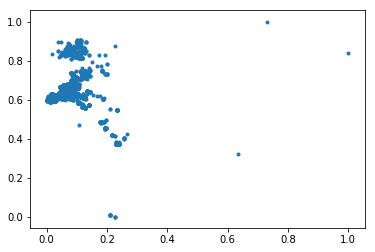

In [84]:
df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
plt.scatter(df_spmes["lat"], df_spmes["lng"],marker=".")

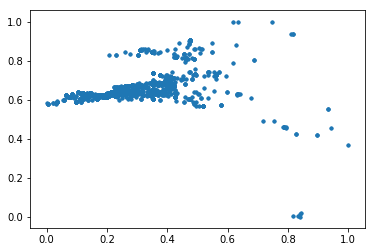

In [85]:
df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
plt.scatter(df_gfest["lat"], df_gfest["lng"],marker=".")

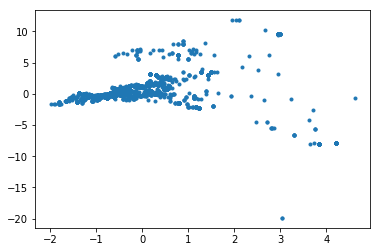

In [86]:
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".")

# Autoencoder

In [87]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [88]:
input_dim = len(df_atmes.columns)
input_dim

24

In [89]:
#len(df_gfmes.columns)

In [90]:
#len(df_spmes.columns)

In [91]:
# Rede com somente uma camada escondida para a base limpa
encoding_dim1 = 12
entrada = Input(shape=(input_dim,))
encoded1 = Dense(encoding_dim1,activation="relu")(entrada)
decoded2 = Dense(input_dim,activation="linear")(encoded1)

In [92]:
autoencoder = Model(entrada,decoded2)
#codificador = Model(entrada,encoded)
#cod = Input(shape=(encoding_dim,))
#dec = autoencoder.layers[-1]
#decodificador = Model(cod,dec(cod))

In [93]:
#Ajusta as funções de otimização e de perda
#Prof. Juan prefere o adam, então vamo lá
#autoencoder.compile(optimizer='adadelta', loss='mse')
autoencoder.compile(optimizer='adam', loss='mse')

## American Toad

In [94]:
# Separa o train_set do teste_set
# Passa o dataset e ele retorna teste_size% dele pelo segundo retorno para teste e o resto pelo primeiro p treino
# random_state é a semente do gerador de pseudoaleatórios para que seja sempre o mesmo testset
# dessa forma, não acontece de acabar pegando todo o dataset se chamar esse método várias vezes
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)
#X_trainAtEst, X_testAtEst = train_test_split(df_atest, test_size=0.30, random_state=42)

In [95]:
attrain_dim = len(X_trainAtMes)
attrain_dim

2572

In [96]:
batch = attrain_dim//10

In [97]:
attest_dim = len(X_testAtMes)
attest_dim

1103

In [98]:
autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes))

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 1s 229us/step - loss: 2.8410 - val_loss: 2.4945
Epoch 2/3000
2572/2572 [==============================] - 0s 10us/step - loss: 2.6190 - val_loss: 2.3100
Epoch 3/3000
2572/2572 [==============================] - 0s 19us/step - loss: 2.4395 - val_loss: 2.1630
Epoch 4/3000
2572/2572 [==============================] - 0s 14us/step - loss: 2.3016 - val_loss: 2.0379
Epoch 5/3000
2572/2572 [==============================] - 0s 20us/step - loss: 2.1709 - val_loss: 1.9309
Epoch 6/3000
2572/2572 [==============================] - 0s 23us/step - loss: 2.0600 - val_loss: 1.8349
Epoch 7/3000
2572/2572 [==============================] - 0s 16us/step - loss: 1.9579 - val_loss: 1.7446
Epoch 8/3000
2572/2572 [==============================] - 0s 23us/step - loss: 1.8712 - val_loss: 1.6532
Epoch 9/3000
2572/2572 [==============================] - 0s 18us/step - loss: 1.7710 - val_loss: 1.5679
Epoch 

2572/2572 [==============================] - 0s 11us/step - loss: 0.1425 - val_loss: 0.1491
Epoch 79/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1402 - val_loss: 0.1469
Epoch 80/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.1381 - val_loss: 0.1449
Epoch 81/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.1360 - val_loss: 0.1428
Epoch 82/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1340 - val_loss: 0.1410
Epoch 83/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1322 - val_loss: 0.1394
Epoch 84/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1305 - val_loss: 0.1378
Epoch 85/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1288 - val_loss: 0.1360
Epoch 86/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1271 - val_loss: 0.1342
Epoch 87/3000
2572/2572 [==============================] - 0

Epoch 155/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0646 - val_loss: 0.0716
Epoch 156/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0646 - val_loss: 0.0713
Epoch 157/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0645 - val_loss: 0.0707
Epoch 158/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0637 - val_loss: 0.0698
Epoch 159/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0629 - val_loss: 0.0692
Epoch 160/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0622 - val_loss: 0.0687
Epoch 161/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0617 - val_loss: 0.0683
Epoch 162/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0612 - val_loss: 0.0678
Epoch 163/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0609 - val_loss: 0.0677
Epoch 164/3000
2572/2572 [================

Epoch 232/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0413 - val_loss: 0.0474
Epoch 233/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0411 - val_loss: 0.0471
Epoch 234/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0409 - val_loss: 0.0469
Epoch 235/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0408 - val_loss: 0.0469
Epoch 236/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0406 - val_loss: 0.0465
Epoch 237/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0403 - val_loss: 0.0463
Epoch 238/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0402 - val_loss: 0.0461
Epoch 239/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0403 - val_loss: 0.0462
Epoch 240/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0400 - val_loss: 0.0459
Epoch 241/3000
2572/2572 [=============

Epoch 309/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0269 - val_loss: 0.0313
Epoch 310/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0265 - val_loss: 0.0309
Epoch 311/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0263 - val_loss: 0.0307
Epoch 312/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0260 - val_loss: 0.0305
Epoch 313/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0258 - val_loss: 0.0303
Epoch 314/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0257 - val_loss: 0.0301
Epoch 315/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0255 - val_loss: 0.0299
Epoch 316/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0254 - val_loss: 0.0297
Epoch 317/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0254 - val_loss: 0.0298
Epoch 318/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 9us/step - loss: 0.0177 - val_loss: 0.0222
Epoch 386/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0175 - val_loss: 0.0222
Epoch 387/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0176 - val_loss: 0.0221
Epoch 388/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0173 - val_loss: 0.0219
Epoch 389/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0172 - val_loss: 0.0219
Epoch 390/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0171 - val_loss: 0.0218
Epoch 391/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0171 - val_loss: 0.0218
Epoch 392/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0171 - val_loss: 0.0218
Epoch 393/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0170 - val_loss: 0.0217
Epoch 394/3000
2572/2572 [==============================

2572/2572 [==============================] - 0s 8us/step - loss: 0.0145 - val_loss: 0.0190
Epoch 463/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0146 - val_loss: 0.0189
Epoch 464/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0144 - val_loss: 0.0189
Epoch 465/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0146 - val_loss: 0.0189
Epoch 466/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0144 - val_loss: 0.0189
Epoch 467/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0143 - val_loss: 0.0188
Epoch 468/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0143 - val_loss: 0.0189
Epoch 469/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0151 - val_loss: 0.0189
Epoch 470/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0145 - val_loss: 0.0189
Epoch 471/3000
2572/2572 [==============================]

2572/2572 [==============================] - 0s 8us/step - loss: 0.0131 - val_loss: 0.0172
Epoch 540/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0133 - val_loss: 0.0171
Epoch 541/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0132 - val_loss: 0.0171
Epoch 542/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0133 - val_loss: 0.0172
Epoch 543/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0131 - val_loss: 0.0171
Epoch 544/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0131 - val_loss: 0.0170
Epoch 545/3000
2572/2572 [==============================] - ETA: 0s - loss: 0.011 - 0s 9us/step - loss: 0.0130 - val_loss: 0.0170
Epoch 546/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0131 - val_loss: 0.0170
Epoch 547/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0130 - val_loss: 0.0170
Epoch 548/3000
2572/2572 [=========

Epoch 616/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0132 - val_loss: 0.0167
Epoch 617/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0128 - val_loss: 0.0166
Epoch 618/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0126 - val_loss: 0.0164
Epoch 619/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0126 - val_loss: 0.0163
Epoch 620/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0125 - val_loss: 0.0163
Epoch 621/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0124 - val_loss: 0.0163
Epoch 622/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0125 - val_loss: 0.0164
Epoch 623/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0125 - val_loss: 0.0164
Epoch 624/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0126 - val_loss: 0.0163
Epoch 625/3000
2572/2572 [=================

Epoch 693/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0127 - val_loss: 0.0163
Epoch 694/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0124 - val_loss: 0.0161
Epoch 695/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0124 - val_loss: 0.0161
Epoch 696/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0129 - val_loss: 0.0160
Epoch 697/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0124 - val_loss: 0.0160
Epoch 698/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0127 - val_loss: 0.0163
Epoch 699/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0125 - val_loss: 0.0161
Epoch 700/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0123 - val_loss: 0.0160
Epoch 701/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0122 - val_loss: 0.0160
Epoch 702/3000
2572/2572 [============

2572/2572 [==============================] - 0s 13us/step - loss: 0.0122 - val_loss: 0.0158
Epoch 770/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0122 - val_loss: 0.0162
Epoch 771/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0147 - val_loss: 0.0165
Epoch 772/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0130 - val_loss: 0.0162
Epoch 773/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0124 - val_loss: 0.0160
Epoch 774/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0159
Epoch 775/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0158
Epoch 776/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0122 - val_loss: 0.0159
Epoch 777/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0158
Epoch 778/3000
2572/2572 [==============================]

Epoch 846/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0160
Epoch 847/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0129 - val_loss: 0.0166
Epoch 848/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0200 - val_loss: 0.0248
Epoch 849/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0188 - val_loss: 0.0172
Epoch 850/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0128 - val_loss: 0.0165
Epoch 851/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0128 - val_loss: 0.0164
Epoch 852/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0125 - val_loss: 0.0159
Epoch 853/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0122 - val_loss: 0.0161
Epoch 854/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0137 - val_loss: 0.0162
Epoch 855/3000
2572/2572 [=================

Epoch 923/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0124 - val_loss: 0.0160
Epoch 924/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0122 - val_loss: 0.0158
Epoch 925/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 926/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0124 - val_loss: 0.0157
Epoch 927/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 928/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 929/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 930/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0125 - val_loss: 0.0158
Epoch 931/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 932/3000
2572/2572 [=================

Epoch 1000/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1001/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1002/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1003/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1004/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1005/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1006/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1007/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1008/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 1009/3000
2572/2572 [===

2572/2572 [==============================] - 0s 12us/step - loss: 0.0144 - val_loss: 0.0157
Epoch 1077/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0125 - val_loss: 0.0161
Epoch 1078/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0126 - val_loss: 0.0157
Epoch 1079/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1080/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1081/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1082/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1083/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0156
Epoch 1084/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1085/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0158
Epoch 1153/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0128 - val_loss: 0.0161
Epoch 1154/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 1155/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0158
Epoch 1156/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1157/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1158/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1159/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1160/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1161/3000
2572/2572 [=======================

2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1229/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1230/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1231/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 1232/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1233/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1234/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1235/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1236/3000
2572/2572 [==============================] - 0s 8us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1237/3000
2572/2572 [======================

2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1305/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1306/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1307/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0156
Epoch 1308/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0158
Epoch 1309/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0126 - val_loss: 0.0159
Epoch 1310/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0158
Epoch 1311/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0126 - val_loss: 0.0157
Epoch 1312/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0124 - val_loss: 0.0166
Epoch 1313/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1381/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1382/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1383/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1384/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1385/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1386/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1387/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1388/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1389/3000
2572/2572 [==================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1457/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1458/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1459/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 1460/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1461/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1462/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1463/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1464/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1465/3000
2572/2572 [===================

Epoch 1532/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0156
Epoch 1533/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0155
Epoch 1534/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0155
Epoch 1535/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1536/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0122 - val_loss: 0.0155
Epoch 1537/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1538/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1539/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0125 - val_loss: 0.0157
Epoch 1540/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 1541/3000
2572/2572 [==

2572/2572 [==============================] - 0s 12us/step - loss: 0.0126 - val_loss: 0.0159
Epoch 1609/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1610/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1611/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 1612/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1613/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1614/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0127 - val_loss: 0.0157
Epoch 1615/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0123 - val_loss: 0.0156
Epoch 1616/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1617/3000
2572/2572 [====================

2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 1685/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1686/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1687/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0124 - val_loss: 0.0156
Epoch 1688/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1689/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1690/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1691/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1692/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1693/3000
2572/2572 [=====================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1761/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1762/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1763/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 1764/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1765/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 1766/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0128 - val_loss: 0.0160
Epoch 1767/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0130 - val_loss: 0.0160
Epoch 1768/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0159
Epoch 1769/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 20us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1837/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1838/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1839/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1840/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1841/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1842/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1843/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0158
Epoch 1844/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0131 - val_loss: 0.0163
Epoch 1845/3000
2572/2572 [==================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1913/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0125 - val_loss: 0.0159
Epoch 1914/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0126 - val_loss: 0.0158
Epoch 1915/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1916/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1917/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1918/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1919/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 1920/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 1921/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 1989/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 1990/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0159
Epoch 1991/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0140 - val_loss: 0.0159
Epoch 1992/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0125 - val_loss: 0.0159
Epoch 1993/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 1994/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0155
Epoch 1995/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 1996/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 1997/3000
2572/2572 [==================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0126 - val_loss: 0.0156
Epoch 2065/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2066/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2067/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2068/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2069/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2070/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2071/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2072/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2073/3000
2572/2572 [==================

2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2141/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2142/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2143/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2144/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2145/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0155
Epoch 2146/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2147/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2148/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2149/3000
2572/2572 [==================

Epoch 2216/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0159
Epoch 2217/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0138 - val_loss: 0.0159
Epoch 2218/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0126 - val_loss: 0.0159
Epoch 2219/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0125 - val_loss: 0.0158
Epoch 2220/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 2221/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2222/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2223/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2224/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2225/3000
2572/2572 [==

Epoch 2292/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2293/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2294/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 2295/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0126 - val_loss: 0.0157
Epoch 2296/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0157
Epoch 2297/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0159
Epoch 2298/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0126 - val_loss: 0.0159
Epoch 2299/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0125 - val_loss: 0.0159
Epoch 2300/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 2301/3000
2572/2572 [===

Epoch 2368/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2369/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2370/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0124 - val_loss: 0.0157
Epoch 2371/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0125 - val_loss: 0.0157
Epoch 2372/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 2373/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 2374/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2375/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2376/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0162
Epoch 2377/3000
2572/2572 [====

Epoch 2444/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 2445/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0127 - val_loss: 0.0160
Epoch 2446/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0125 - val_loss: 0.0160
Epoch 2447/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 2448/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2449/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2450/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2451/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2452/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2453/3000
2572/2572 [====

2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2521/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2522/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0124 - val_loss: 0.0156
Epoch 2523/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 2524/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2525/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0158
Epoch 2526/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0127 - val_loss: 0.0157
Epoch 2527/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0123 - val_loss: 0.0158
Epoch 2528/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2529/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 10us/step - loss: 0.0125 - val_loss: 0.0157
Epoch 2597/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2598/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2599/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2600/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2601/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2602/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2603/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2604/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2605/3000
2572/2572 [==================

2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 2673/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 2674/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 2675/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 2676/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0156
Epoch 2677/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2678/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0121 - val_loss: 0.0159
Epoch 2679/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0146 - val_loss: 0.0168
Epoch 2680/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0131 - val_loss: 0.0165
Epoch 2681/3000
2572/2572 [==================

Epoch 2748/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2749/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0157
Epoch 2750/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0124 - val_loss: 0.0157
Epoch 2751/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2752/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2753/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2754/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2755/3000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2756/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2757/3000
2572/2572 [=======

2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2825/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2826/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2827/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2828/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0130 - val_loss: 0.0159
Epoch 2829/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0161
Epoch 2830/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0132 - val_loss: 0.0162
Epoch 2831/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0124 - val_loss: 0.0158
Epoch 2832/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 2833/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 9us/step - loss: 0.0125 - val_loss: 0.0157
Epoch 2901/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0122 - val_loss: 0.0157
Epoch 2902/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2903/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2904/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2905/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2906/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2907/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0156
Epoch 2908/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2909/3000
2572/2572 [===================

2572/2572 [==============================] - 0s 10us/step - loss: 0.0123 - val_loss: 0.0157
Epoch 2977/3000
2572/2572 [==============================] - 0s 9us/step - loss: 0.0121 - val_loss: 0.0157
Epoch 2978/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2979/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2980/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2981/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2982/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2983/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0155
Epoch 2984/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0120 - val_loss: 0.0156
Epoch 2985/3000
2572/2572 [==================

In [99]:
#Faz o teste de previsão
testeAtMes = autoencoder.predict(X_testAtMes)

In [100]:
# Erro calculado na última época com Mean Squared Error
# Quanto maior o erro, mais tá errando
# Erro de teste
autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 2us/step


0.015553622506558895

In [101]:
# Erro de treino
autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=attrain_dim)

2572/2572 [==============================] - 0s 2us/step


0.012027385644614697

In [102]:
# Rede com apenas uma codificação
# Quanto mais perto de 1, mais tá acertando
r2_score(X_testAtMes,testeAtMes)

0.8044667064618857

In [103]:
# Prevê  o treino e avalia o score dele
trainAtMes = autoencoder.predict(X_trainAtMes)
r2_score(X_trainAtMes,trainAtMes)

0.8198394997819024

In [104]:
testeAtMes = pd.DataFrame(testeAtMes, columns=df_atmes.columns)
testeAtMes.head()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,mindewptm,minpressurem,maxtempm,meanwindspdm,hail,meandewptm,precipm,meantempm,maxhumidity,mintempm
0,0.245644,-0.275220,1.272081,-0.065902,0.039278,0.426350,-0.000301,-0.548413,0.023162,0.959711,...,-0.420020,-0.837408,-1.362333,0.148751,-0.000795,-0.500172,0.004112,-1.042068,0.011201,-0.438477
1,0.003988,-0.634779,-0.506471,0.028678,0.010945,-0.419390,-0.011741,-0.480459,0.060186,0.268661,...,-0.655368,-0.249983,0.025653,0.529141,0.002176,-0.586956,1.004745,-0.253985,-1.556186,-0.429672
2,0.733792,-0.564272,0.085164,0.322759,0.017470,-0.003484,0.009326,0.196682,0.054570,-0.102559,...,-0.112737,-0.732734,0.051164,0.521949,0.008938,0.098871,0.003432,0.168401,-0.437323,0.130985
3,0.622958,-0.569795,-0.173395,0.025637,0.009409,0.926808,4.453959,1.043439,0.055636,-0.432651,...,1.178005,-0.834910,0.400691,0.315885,-0.000939,1.206024,0.303754,1.049448,-0.172797,1.172112
4,0.021076,0.387179,-0.003960,-0.034215,0.013546,-0.501356,-0.009419,-0.476174,0.009951,0.714195,...,-0.647896,0.286738,-0.156638,-0.696429,0.000920,-0.590663,0.003162,-0.756967,0.414724,-1.018936


In [105]:
X_testAtMes.head()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,precipi,heatingdegreedays,...,mindewptm,minpressurem,maxtempm,meanwindspdm,hail,meandewptm,precipm,meantempm,maxhumidity,mintempm
2127,0.245304,-0.278542,1.264369,0.0,0.0,0.387243,0.000000,-0.750,0.00,1.000000,...,-0.333333,-0.850316,-1.285714,0.166667,0.0,-0.500,0.0,-0.956644,0.000000,-0.375
1744,-0.003458,-0.622581,-0.491313,0.0,0.0,-0.497373,0.000000,0.000,0.04,0.166667,...,-1.000000,-0.225316,-0.142857,0.500000,0.0,-0.625,1.0,-0.289977,-1.615385,-0.375
2868,0.744022,-0.552208,0.081357,1.0,0.0,0.118012,0.000000,0.375,0.00,-0.083333,...,-0.444444,-0.725316,0.000000,0.500000,0.0,0.125,0.0,0.210023,-0.384615,0.250
2754,0.620761,-0.577880,-0.211106,0.0,0.0,0.964166,4.453582,0.875,0.01,-0.500000,...,1.333333,-0.850316,0.428571,0.333333,0.0,1.125,0.3,1.043356,-0.153846,1.125
1691,-0.002214,0.377419,-0.004966,0.0,0.0,-0.458911,0.000000,-0.625,0.00,0.750000,...,-0.333333,0.274684,-0.142857,-0.666667,0.0,-0.375,0.0,-0.789977,0.461538,-1.125


In [106]:
score = {}
for c in testeAtMes.columns:
    score[c] = r2_score(X_testAtMes[c],testeAtMes[c])
score

{'coolingdegreedays': 0.9999269731709931,
 'date': 0.9986667962274225,
 'fog': 0.1270759376283358,
 'gdegreedays': 0.9211796539804357,
 'hail': -0.005605254812757643,
 'heatingdegreedays': 0.9898163598771823,
 'humidity': 0.9529698741210683,
 'lat': 0.9998399690193895,
 'lng': 0.9998359919305521,
 'maxdewptm': 0.9366040776092434,
 'maxhumidity': 0.9943205367971075,
 'maxtempm': 0.992513997305577,
 'meandewptm': 0.9833114234740389,
 'meantempm': 0.9915144872675549,
 'meanwindspdm': 0.9993288468096453,
 'mindewptm': 0.9332439274198382,
 'minhumidity': 0.9627545026303552,
 'minpressurem': 0.9991588471333094,
 'mintempm': 0.9910367081255648,
 'precipi': 0.2700097090449586,
 'precipm': 0.9999702741084848,
 'rain': 0.9721542488518896,
 'snow': 0.027996854314250696,
 'thunder': 0.2695762130508207}

# Base C

In [107]:
df_atmess.drop('Unnamed: 0',axis=1,inplace=True)

In [108]:
cinput_dim = len(df_atmess.columns)
cinput_dim

35

In [109]:
# Rede com somente uma camada escondida para a base em C
cencoding_dim1 = 17
centrada = Input(shape=(cinput_dim,))
cencoded1 = Dense(cencoding_dim1,activation="relu")(centrada)
cdecoded2 = Dense(cinput_dim,activation="linear")(cencoded1)

In [110]:
cautoencoder = Model(centrada,cdecoded2)

In [111]:
cautoencoder.compile(optimizer='adam', loss='mse')

In [112]:
cX_trainAtMes, cX_testAtMes = train_test_split(df_atmess, test_size=0.30, random_state=42)

In [113]:
cautoencoder.fit(cX_trainAtMes, cX_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(cX_testAtMes, cX_testAtMes))

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 0s 154us/step - loss: 2.3681 - val_loss: 2.0785
Epoch 2/3000
2572/2572 [==============================] - 0s 10us/step - loss: 2.1582 - val_loss: 1.9041
Epoch 3/3000
2572/2572 [==============================] - 0s 14us/step - loss: 1.9908 - val_loss: 1.7620
Epoch 4/3000
2572/2572 [==============================] - 0s 11us/step - loss: 1.8498 - val_loss: 1.6454
Epoch 5/3000
2572/2572 [==============================] - 0s 11us/step - loss: 1.7233 - val_loss: 1.5439
Epoch 6/3000
2572/2572 [==============================] - 0s 10us/step - loss: 1.6284 - val_loss: 1.4532
Epoch 7/3000
2572/2572 [==============================] - 0s 11us/step - loss: 1.5367 - val_loss: 1.3744
Epoch 8/3000
2572/2572 [==============================] - 0s 10us/step - loss: 1.4526 - val_loss: 1.3004
Epoch 9/3000
2572/2572 [==============================] - 0s 12us/step - loss: 1.3735 - val_loss: 1.2283
Epoch 

Epoch 78/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0844 - val_loss: 0.0915
Epoch 79/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0831 - val_loss: 0.0899
Epoch 80/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0818 - val_loss: 0.0881
Epoch 81/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0802 - val_loss: 0.0870
Epoch 82/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0789 - val_loss: 0.0859
Epoch 83/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0776 - val_loss: 0.0847
Epoch 84/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0765 - val_loss: 0.0836
Epoch 85/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0754 - val_loss: 0.0823
Epoch 86/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0743 - val_loss: 0.0814
Epoch 87/3000
2572/2572 [=====================

Epoch 155/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0352 - val_loss: 0.0415
Epoch 156/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0351 - val_loss: 0.0414
Epoch 157/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0368 - val_loss: 0.0427
Epoch 158/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0354 - val_loss: 0.0414
Epoch 159/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0353 - val_loss: 0.0407
Epoch 160/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0341 - val_loss: 0.0404
Epoch 161/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0336 - val_loss: 0.0396
Epoch 162/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0333 - val_loss: 0.0395
Epoch 163/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0330 - val_loss: 0.0391
Epoch 164/3000
2572/2572 [===========

2572/2572 [==============================] - 0s 11us/step - loss: 0.0202 - val_loss: 0.0253
Epoch 232/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0202 - val_loss: 0.0255
Epoch 233/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0199 - val_loss: 0.0251
Epoch 234/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0197 - val_loss: 0.0250
Epoch 235/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0195 - val_loss: 0.0248
Epoch 236/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0196 - val_loss: 0.0248
Epoch 237/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0197 - val_loss: 0.0247
Epoch 238/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0193 - val_loss: 0.0246
Epoch 239/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0198 - val_loss: 0.0245
Epoch 240/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0137 - val_loss: 0.0181
Epoch 308/3000
2572/2572 [==============================] - 0s 32us/step - loss: 0.0137 - val_loss: 0.0179
Epoch 309/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0136 - val_loss: 0.0179
Epoch 310/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0136 - val_loss: 0.0179
Epoch 311/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0136 - val_loss: 0.0178
Epoch 312/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0134 - val_loss: 0.0177
Epoch 313/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0133 - val_loss: 0.0176
Epoch 314/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0134 - val_loss: 0.0176
Epoch 315/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0134 - val_loss: 0.0176
Epoch 316/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 27us/step - loss: 0.0108 - val_loss: 0.0144
Epoch 384/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0109 - val_loss: 0.0144
Epoch 385/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0108 - val_loss: 0.0144
Epoch 386/3000
2572/2572 [==============================] - 0s 35us/step - loss: 0.0108 - val_loss: 0.0143
Epoch 387/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0107 - val_loss: 0.0143
Epoch 388/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0107 - val_loss: 0.0143
Epoch 389/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0109 - val_loss: 0.0143
Epoch 390/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0109 - val_loss: 0.0143
Epoch 391/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0108 - val_loss: 0.0142
Epoch 392/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0093 - val_loss: 0.0126
Epoch 460/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0094 - val_loss: 0.0133
Epoch 461/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0135 - val_loss: 0.0144
Epoch 462/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0111 - val_loss: 0.0134
Epoch 463/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0112 - val_loss: 0.0133
Epoch 464/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0101 - val_loss: 0.0128
Epoch 465/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0100 - val_loss: 0.0128
Epoch 466/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0096 - val_loss: 0.0127
Epoch 467/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0098 - val_loss: 0.0128
Epoch 468/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0087 - val_loss: 0.0115
Epoch 536/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0087 - val_loss: 0.0115
Epoch 537/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0086 - val_loss: 0.0115
Epoch 538/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0086 - val_loss: 0.0116
Epoch 539/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0089 - val_loss: 0.0116
Epoch 540/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0087 - val_loss: 0.0118
Epoch 541/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0098 - val_loss: 0.0119
Epoch 542/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0090 - val_loss: 0.0116
Epoch 543/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0087 - val_loss: 0.0115
Epoch 544/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0084 - val_loss: 0.0111
Epoch 612/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0083 - val_loss: 0.0111
Epoch 613/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0083 - val_loss: 0.0110
Epoch 614/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0083 - val_loss: 0.0110
Epoch 615/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0082 - val_loss: 0.0110
Epoch 616/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0083 - val_loss: 0.0111
Epoch 617/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0110
Epoch 618/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0083 - val_loss: 0.0110
Epoch 619/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0083 - val_loss: 0.0110
Epoch 620/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0079 - val_loss: 0.0107
Epoch 688/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0079 - val_loss: 0.0108
Epoch 689/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0082 - val_loss: 0.0107
Epoch 690/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0080 - val_loss: 0.0107
Epoch 691/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0080 - val_loss: 0.0110
Epoch 692/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0089 - val_loss: 0.0112
Epoch 693/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0084 - val_loss: 0.0114
Epoch 694/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0125 - val_loss: 0.0124
Epoch 695/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0092 - val_loss: 0.0122
Epoch 696/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0087 - val_loss: 0.0112
Epoch 764/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0083 - val_loss: 0.0108
Epoch 765/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0079 - val_loss: 0.0105
Epoch 766/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0078 - val_loss: 0.0108
Epoch 767/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0085 - val_loss: 0.0110
Epoch 768/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0088 - val_loss: 0.0111
Epoch 769/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0084 - val_loss: 0.0108
Epoch 770/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0080 - val_loss: 0.0121
Epoch 771/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0124 - val_loss: 0.0132
Epoch 772/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 14us/step - loss: 0.0077 - val_loss: 0.0105
Epoch 840/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 841/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0105
Epoch 842/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0078 - val_loss: 0.0105
Epoch 843/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0078 - val_loss: 0.0105
Epoch 844/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 845/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 846/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 847/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0078 - val_loss: 0.0106
Epoch 848/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0104
Epoch 916/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0078 - val_loss: 0.0104
Epoch 917/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0078 - val_loss: 0.0104
Epoch 918/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 919/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 920/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0105
Epoch 921/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 922/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 923/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0104
Epoch 924/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 992/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 993/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 994/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 995/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 996/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0077 - val_loss: 0.0103
Epoch 997/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 998/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 999/3000
2572/2572 [==============================] - 0s 28us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1000/3000
2572/2572 [=========================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1068/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1069/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1070/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1071/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1072/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0077 - val_loss: 0.0103
Epoch 1073/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1074/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1075/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1076/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0083 - val_loss: 0.0108
Epoch 1144/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0080 - val_loss: 0.0104
Epoch 1145/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0077 - val_loss: 0.0103
Epoch 1146/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1147/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0078 - val_loss: 0.0103
Epoch 1148/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1149/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1150/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1151/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0077 - val_loss: 0.0103
Epoch 1152/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0077 - val_loss: 0.0103
Epoch 1219/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1220/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1221/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1222/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1223/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1224/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1225/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1226/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1227/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1295/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1296/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1297/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1298/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1299/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1300/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0104
Epoch 1301/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0080 - val_loss: 0.0103
Epoch 1302/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0077 - val_loss: 0.0103
Epoch 1303/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1371/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1372/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1373/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 1374/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1375/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0076 - val_loss: 0.0105
Epoch 1376/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0083 - val_loss: 0.0106
Epoch 1377/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0078 - val_loss: 0.0103
Epoch 1378/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1379/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1447/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1448/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 1449/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1450/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1451/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1452/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1453/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0104
Epoch 1454/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1455/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1523/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1524/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1525/3000
2572/2572 [==============================] - 0s 31us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1526/3000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1527/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1528/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1529/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.0075 - val_loss: 0.0104
Epoch 1530/3000
2572/2572 [==============================] - 0s 10us/step - loss: 0.0080 - val_loss: 0.0103
Epoch 1531/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 20us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1599/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1600/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1601/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 1602/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0078 - val_loss: 0.0104
Epoch 1603/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0076 - val_loss: 0.0107
Epoch 1604/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0091 - val_loss: 0.0104
Epoch 1605/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0080 - val_loss: 0.0104
Epoch 1606/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1607/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0077 - val_loss: 0.0102
Epoch 1675/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1676/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1677/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1678/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1679/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1680/3000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1681/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1682/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0103
Epoch 1683/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 20us/step - loss: 0.0077 - val_loss: 0.0104
Epoch 1751/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0082 - val_loss: 0.0106
Epoch 1752/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0080 - val_loss: 0.0106
Epoch 1753/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0079 - val_loss: 0.0106
Epoch 1754/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0079 - val_loss: 0.0106
Epoch 1755/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0078 - val_loss: 0.0104
Epoch 1756/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1757/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1758/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1759/3000
2572/2572 [=================

Epoch 1826/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1827/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1828/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 1829/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1830/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0101
Epoch 1831/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1832/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1833/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 1834/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 1835/3000
2572/2572 [=

Epoch 1902/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 1903/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1904/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0078 - val_loss: 0.0102
Epoch 1905/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0077 - val_loss: 0.0102
Epoch 1906/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1907/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0104
Epoch 1908/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0080 - val_loss: 0.0103
Epoch 1909/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1910/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 1911/3000
2572/2572 [=

Epoch 1978/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 1979/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 1980/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0078 - val_loss: 0.0103
Epoch 1981/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1982/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0076 - val_loss: 0.0103
Epoch 1983/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 1984/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0077 - val_loss: 0.0102
Epoch 1985/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0076 - val_loss: 0.0105
Epoch 1986/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0119 - val_loss: 0.0132
Epoch 1987/3000
2572/2572 [=

Epoch 2054/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2055/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2056/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0079 - val_loss: 0.0102
Epoch 2057/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2058/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 2059/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0104
Epoch 2060/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2061/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2062/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2063/3000
2572/2572 [=

Epoch 2130/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0078 - val_loss: 0.0114
Epoch 2131/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0124 - val_loss: 0.0126
Epoch 2132/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0095 - val_loss: 0.0112
Epoch 2133/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0082 - val_loss: 0.0106
Epoch 2134/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0078 - val_loss: 0.0103
Epoch 2135/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2136/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2137/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2138/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2139/3000
2572/2572 [=

2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2206/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2207/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0076 - val_loss: 0.0101
Epoch 2208/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2209/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2210/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2211/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0077 - val_loss: 0.0102
Epoch 2212/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2213/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2214/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2282/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2283/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2284/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2285/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2286/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2287/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2288/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2289/3000
2572/2572 [==============================] - 0s 33us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2290/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0082 - val_loss: 0.0104
Epoch 2358/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0079 - val_loss: 0.0106
Epoch 2359/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0094 - val_loss: 0.0111
Epoch 2360/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0085 - val_loss: 0.0106
Epoch 2361/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0079 - val_loss: 0.0106
Epoch 2362/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0077 - val_loss: 0.0102
Epoch 2363/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0103
Epoch 2364/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0078 - val_loss: 0.0102
Epoch 2365/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2366/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2434/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2435/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0100
Epoch 2436/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0100
Epoch 2437/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2438/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0102
Epoch 2439/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2440/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2441/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2442/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2510/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2511/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0134
Epoch 2512/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0213 - val_loss: 0.0196
Epoch 2513/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0171 - val_loss: 0.0167
Epoch 2514/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0126 - val_loss: 0.0132
Epoch 2515/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0103 - val_loss: 0.0115
Epoch 2516/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0085 - val_loss: 0.0108
Epoch 2517/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0080 - val_loss: 0.0104
Epoch 2518/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 22us/step - loss: 0.0077 - val_loss: 0.0101
Epoch 2586/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2587/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2588/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2589/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0100
Epoch 2590/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0073 - val_loss: 0.0100
Epoch 2591/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2592/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2593/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2594/3000
2572/2572 [=================

Epoch 2661/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2662/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0077 - val_loss: 0.0102
Epoch 2663/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2664/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2665/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2666/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2667/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2668/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0076 - val_loss: 0.0101
Epoch 2669/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2670/3000
2572/2572 [=

2572/2572 [==============================] - 0s 17us/step - loss: 0.0085 - val_loss: 0.0105
Epoch 2737/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0079 - val_loss: 0.0104
Epoch 2738/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2739/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2740/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2741/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2742/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2743/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0077 - val_loss: 0.0101
Epoch 2744/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0075 - val_loss: 0.0102
Epoch 2745/3000
2572/2572 [=================

Epoch 2812/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0087 - val_loss: 0.0107
Epoch 2813/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0080 - val_loss: 0.0103
Epoch 2814/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2815/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2816/3000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2817/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2818/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0076 - val_loss: 0.0101
Epoch 2819/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2820/3000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2821/3000
2572/2572 [=

2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2888/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0075 - val_loss: 0.0100
Epoch 2889/3000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0075 - val_loss: 0.0100
Epoch 2890/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2891/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0073 - val_loss: 0.0100
Epoch 2892/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2893/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0075 - val_loss: 0.0100
Epoch 2894/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0100
Epoch 2895/3000
2572/2572 [==============================] - 0s 15us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2896/3000
2572/2572 [=================

2572/2572 [==============================] - 0s 17us/step - loss: 0.0075 - val_loss: 0.0101
Epoch 2964/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0081 - val_loss: 0.0103
Epoch 2965/3000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0102
Epoch 2966/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2967/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0076 - val_loss: 0.0101
Epoch 2968/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2969/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0074 - val_loss: 0.0101
Epoch 2970/3000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0074 - val_loss: 0.0100
Epoch 2971/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0073 - val_loss: 0.0100
Epoch 2972/3000
2572/2572 [=================

In [114]:
#Faz o teste de previsão
ctesteAtMes = cautoencoder.predict(cX_testAtMes)


In [115]:
cautoencoder.evaluate(x=cX_testAtMes, y=cX_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 4us/step


0.010065305046737194

In [116]:
cautoencoder.evaluate(x=cX_trainAtMes, y=cX_trainAtMes, batch_size=attrain_dim)

2572/2572 [==============================] - 0s 2us/step


0.007400162052363157

In [117]:
r2_score(cX_testAtMes,ctesteAtMes)

0.8715807738377704

In [118]:
ctrainAtMes = cautoencoder.predict(cX_trainAtMes)
r2_score(cX_trainAtMes,ctrainAtMes)

0.8854110513401364

In [119]:
ctesteAtMes = pd.DataFrame(ctesteAtMes, columns=df_atmess.columns)
cscore = {}
for c in ctesteAtMes.columns:
    cscore[c] = r2_score(cX_testAtMes[c],ctesteAtMes[c])
cscore

{'coolingdegreedays': 0.9998123616725636,
 'date': 0.9996084503089951,
 'fog': 0.3004772470865118,
 'gdegreedays': 0.922980090729923,
 'hail': -0.0293132666238054,
 'heatingdegreedays': 0.9908893234765521,
 'humidity': 0.9590538167321245,
 'lat': 0.9998823771842899,
 'lng': 0.9998883614924007,
 'maxdewptm': 0.9742784921467367,
 'maxhumidity': 0.9953889642176091,
 'maxpressurei': 0.9970121000389225,
 'maxpressurem': 0.9962020386070761,
 'maxtempm': 0.9947737523694579,
 'maxwspdi': 0.9981255433791353,
 'maxwspdm': 0.9985256532421832,
 'meandewptm': 0.9832302464069954,
 'meanpressurei': 0.9922346089183278,
 'meanpressurem': 0.9922651276624006,
 'meantempm': 0.9912559868765137,
 'meanwdird': 0.9950320885772248,
 'meanwindspdi': 0.9963916585449674,
 'meanwindspdm': 0.9972495599826557,
 'mindewptm': 0.9619002744825621,
 'minhumidity': 0.9654617956970301,
 'minpressurei': 0.9974155468981395,
 'minpressurem': 0.9970938318989202,
 'mintempm': 0.9932407481464907,
 'minwspdi': 0.9982222445389052,

# Feature Selection

In [133]:
for a in cscore:
    if(cscore[a] < 0.9):
        print(a,cscore[a])

('hail', -0.0293132666238054)
('thunder', 0.27994630180464597)
('snow', 0.022083100445123183)
('fog', 0.3004772470865118)
('precipi', 0.26965741248833697)


# Variational Autoencoder

In [120]:
batch_size = len(df_atmes)
batch_size

3675

In [121]:
latent_dim = 2

In [122]:
x = Input(batch_shape=(attrain_dim, input_dim))
h = Dense(encoding_dim1, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [123]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(attrain_dim, latent_dim),
                              mean=0.)
    return z_mean + K.exp(z_log_sigma) * epsilon

In [124]:
# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [125]:
decoder_h = Dense(encoding_dim1, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [126]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [127]:
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

In [128]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [129]:
attrain_dim

2572

In [130]:
vae.fit(X_trainAtMes, X_trainAtMes,
        shuffle=True,
        epochs=50,
        batch_size=2577,
        validation_data=(X_testAtMes, X_testAtMes))

Train on 2572 samples, validate on 1103 samples
Epoch 1/50


InvalidArgumentError: Incompatible shapes: [1103,2] vs. [2572,2]
	 [[{{node lambda_2/mul}} = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](lambda_2/Exp, lambda_2/random_normal/RandomStandardNormal)]]

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()